In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df['species']=iris.target
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [5]:
df_binary=df[df['species']!=2]
df_binary=df_binary.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)

In [6]:
df_binary

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [7]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values

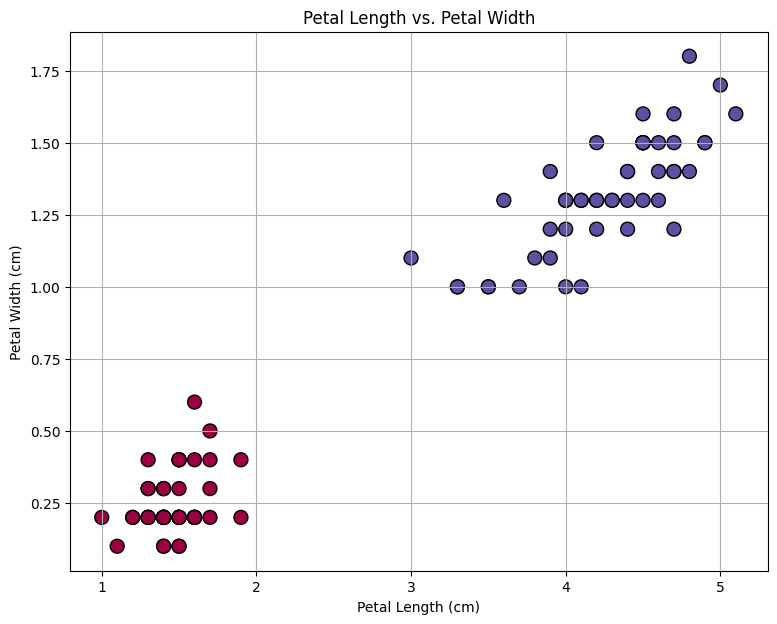

In [8]:
import matplotlib.pyplot as plt

# Plotting petal length vs. petal width
plt.figure(figsize=(9, 7))
plt.scatter(df_binary['petal length (cm)'], df_binary['petal width (cm)'], c=y, cmap='Spectral', s=100, edgecolor='k')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid()
plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [10]:
max = [0,0]
for i in range(5):
    
    classificador=MLP(hidden_layer_sizes=(22,), max_iter=10000, activation="tanh", 
                          learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=i), 
    scoring = {"accuracy": make_scorer(accuracy_score)} , return_estimator = True)
    
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        bb = classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Melhor resultado: 
 Acurácia: 1.0
 Seed: 0


In [11]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

max_acc = [0, 0]  # [Melhor acurácia, Melhor seed]
melhor_modelo = None  # Variável para armazenar o melhor classificador
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Definir um random_state fixo para reprodutibilidade

fold_splits = []  # Lista para armazenar os índices de treino e teste para cada fold

for i in range(5):
    classificador=MLP(hidden_layer_sizes=(22,), max_iter=10000, activation="tanh", 
                          learning_rate_init=0.1, tol = 1e-5, random_state=i)
    # Lista para armazenar os índices do fold
    fold_indices = []

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        fold_indices.append((train_idx, test_idx))  # Armazena os índices

    fold_splits.append(fold_indices)  # Guarda os folds desta seed
    
    result = cross_validate(classificador, X, y, 
                            cv=kf,
                            scoring={"accuracy": make_scorer(accuracy_score)}, 
                            return_estimator=True)

    # Média da acurácia nos folds
    accuracy = np.mean(result['test_accuracy'])
    print(f"Seed {i} - Acurácia Média: {accuracy:.4f}")

    # Atualiza o melhor modelo
    if accuracy > max_acc[0]:
        max_acc = [accuracy, i]
        melhor_modelo = result['estimator']  # Salva os modelos treinados nos folds

# Melhor modelo encontrado
print(f"\nMelhor Resultado: Acurácia = {max_acc[0]:.4f} | Seed = {max_acc[1]}")

modelo_final = melhor_modelo[0]  # Pegamos um dos modelos treinados

# Se quiser visualizar os índices de treino e teste para uma seed e um fold específico
seed_escolhida = 0
fold_escolhido = 0
train_idx, test_idx = fold_splits[seed_escolhida][fold_escolhido]

print(f"Seed {seed_escolhida} - Fold {fold_escolhido}")
print(f"Índices de treino: {train_idx}")
print(f"Índices de teste: {test_idx}")

Seed 0 - Acurácia Média: 1.0000
Seed 1 - Acurácia Média: 1.0000
Seed 2 - Acurácia Média: 1.0000
Seed 3 - Acurácia Média: 1.0000
Seed 4 - Acurácia Média: 1.0000

Melhor Resultado: Acurácia = 1.0000 | Seed = 0
Seed 0 - Fold 0
Índices de treino: [ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 46 47 48 49 50 51 52 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72 73 74 75 76 77 78 79
 81 82 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Índices de teste: [ 0 10 22 39 44 45 53 70 80 83]


In [12]:
# Escolha a seed e o fold específico
seed_escolhida = 0
fold_escolhido = 2

# Obtém os índices de treino e teste do fold escolhido
train_idx, test_idx = fold_splits[seed_escolhida][fold_escolhido]

# Cria os conjuntos de treino e teste
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Exibe os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (90, 2)
Tamanho do conjunto de teste: (10, 2)


In [13]:
bb.fit(X_train, y_train)
Predições=bb.predict(X_test)
print("Predictions:", Predições)
print("Labels:", y_test)

Predictions: [0 0 0 0 0 1 1 1 1 1]
Labels: [0 0 0 0 0 1 1 1 1 1]


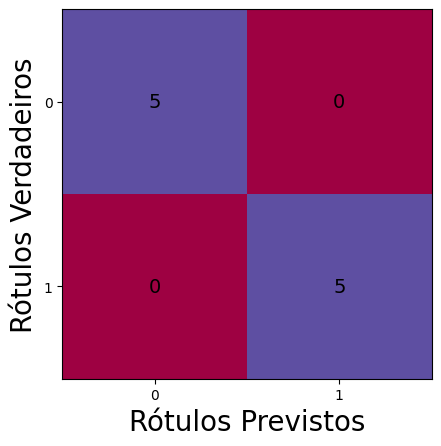

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, Predições, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

In [15]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values

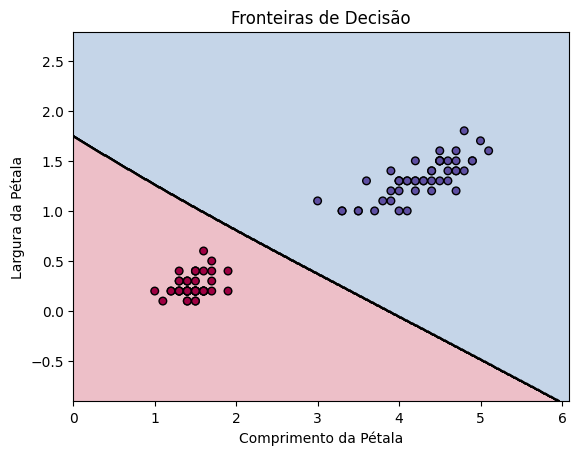

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

## Implementando o Algoritmo Genético

In [17]:
import deap
from functools import partial
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms

In [18]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
individuos_iniciais = df[['petal length (cm)', 'petal width (cm)']].values.tolist()
classes_iniciais = df['species'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [19]:
# # Função de distância (temporária)
# def distance_function(x0d, x1d, discrete, continuous, class_name):
#     # Função de exemplo para calcular distância
#     return np.linalg.norm(np.array(list(x0d.values())) - np.array(list(x1d.values())))

In [20]:
continuous = ['petal length (cm)', 'petal width (cm)']
discrete=[]
class_name = 'species'
idx_features = ['petal length (cm)', 'petal width (cm)']

min_vals = df_binary[continuous].min().values
max_vals = df_binary[continuous].max().values
print(min_vals, max_vals)

[1.  0.1] [5.1 1.8]


In [21]:
def distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals):
    # Converte dicionários em arrays
    u = np.array(list(x0d.values()))
    v = np.array(list(x1d.values()))

    # Normaliza os vetores (evita divisão por zero)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # Garante que não haja divisão por zero
    u_norm = (u - min_vals) / denom
    v_norm = (v - min_vals) / denom

    # Calcula o numerador (distância quadrada entre vetores normalizados)
    numerator = np.sum((u_norm - v_norm) ** 2)

    # Calcula o denominador (norma quadrada normalizada)
    denominator = np.sum(u_norm ** 2) + np.sum(v_norm ** 2)

    return numerator / denominator if denominator != 0 else 0.0

In [22]:
# x_referência=individuos_iniciais[5]
# x_teste=individuos_iniciais[2] 

# x0d = {idx_features[i]: val for i, val in enumerate(x_referência)}
# x1d = {idx_features[i]: val for i, val in enumerate(x_teste)}

# print(x1d, x0d)

In [23]:
# dist = distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
# print(dist)

In [24]:
idx=0
def create_individual():
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  

In [61]:
#Função de fitness

def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # similar_same_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio
    
    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 == y1 else 0.0
    
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
    return evaluation,
   
def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    #similar_different_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 != y1 else 0.0  

    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * target_similarity
    return evaluation,

In [62]:
#Reprodução
def cxBlendWithClass(ind1, ind2, alpha=0.5):
   
    for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i] = (1. - gamma) * x1 + gamma * x2
        ind2[i] = gamma * x1 + (1. - gamma) * x2
    
    # Manter a classe original dos indivíduos sem alterar
    ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
    ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
    
    return ind1, ind2

In [63]:
#Mutação
#mu é a média da distribuição gaussiana e sigma o desvio padrão
def mutGaussianWithClass(individual, mu, sigma, indpb, min_vals=min_vals, max_vals=max_vals):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
            
            # Aplica o clipping se min_vals e max_vals forem fornecidos
            if min_vals is not None and max_vals is not None:
                individual[i] = np.clip(individual[i], min_vals[i], max_vals[i])

    return individual,  # Retorna o indivíduo como tupla

In [64]:
#Criando indivíduos que estão próximos e resultam numa mesma classe
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial
def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.5
    alpha2 = 0.5
    eta = 1.0
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    # Avaliar usando a função de fitness fornecida
    return fitness_sso(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

population = toolbox.population(n=500)
# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_semelhantes = [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_semelhantes}")

Melhor indivíduo: [np.float64(1.4000018844620599), np.float64(0.19999786179919676), 0], Fitness: (0.9999999999654572,)
Novos indivíduos gerados: [[np.float64(1.399784744662246), np.float64(0.19999369407112955)], [np.float64(1.3997048827468552), np.float64(0.19993641172908727)], [np.float64(1.3997746235603743), np.float64(0.19998223959788725)], [np.float64(1.4001846668479736), np.float64(0.20014950839874812)], [np.float64(1.399828491262296), np.float64(0.2000434540790203)], [np.float64(1.399492899614883), np.float64(0.20007172171528362)], [np.float64(1.399506949235019), np.float64(0.20007297920105924)], [np.float64(1.4000352927123993), 0.2], [np.float64(1.413782985213154), np.float64(0.19999977785081377)], [np.float64(1.399939800599645), np.float64(0.1998770295616321)], [np.float64(1.3997977420495127), np.float64(0.19999601823928786)], [np.float64(1.3999661358054392), np.float64(0.20003016571204468)], [np.float64(1.4003825013867766), np.float64(0.19995787147987723)], [np.float64(1.39989

In [65]:
#Criando indivíduos que estão próximos mas resultam em um classe diferente
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.5
    alpha2 = 0.5
    eta = 1.0
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    # Avaliar usando a função de fitness fornecida
    return fitness_sdo(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial
population = toolbox.population(n=500)

# Parâmetros do algoritmo
ngen = 10 # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_diferentes= [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_diferentes}")

Melhor indivíduo: [np.float64(2.700375250871049), np.float64(0.5126701310643792), 0], Fitness: (0.7244356566110602,)
Novos indivíduos gerados: [[np.float64(3.417402239479101), np.float64(0.5556191594795119)], [np.float64(3.3798836819655724), 0.2], [np.float64(2.0033110045046527), np.float64(0.9422458301711112)], [np.float64(2.700375250871049), np.float64(0.9180991199576305)], [np.float64(3.5092919775870324), 0.2], [np.float64(2.224390861788898), np.float64(0.9180991199576305)], [np.float64(2.700375250871049), np.float64(0.9381217930628141)], [np.float64(3.5092919775870324), np.float64(0.9180991199576305)], [np.float64(3.3239811505736387), np.float64(0.5556191594795119)], [np.float64(3.5092919775870324), np.float64(0.9180991199576305)], [np.float64(3.5092919775870324), np.float64(0.9552627571538417)], [np.float64(2.700375250871049), 0.2], [np.float64(1.880618395225629), np.float64(0.9180991199576305)], [np.float64(2.224390861788898), np.float64(0.9180991199576305)], [np.float64(3.509291

In [66]:
SSO=pd.DataFrame(novos_individuos_semelhantes)
SDO=pd.DataFrame(novos_individuos_diferentes)
print(SSO.head())
print(SDO.head())

          0         1
0  1.399785  0.199994
1  1.399705  0.199936
2  1.399775  0.199982
3  1.400185  0.200150
4  1.399828  0.200043
          0         1
0  3.417402  0.555619
1  3.379884  0.200000
2  2.003311  0.942246
3  2.700375  0.918099
4  3.509292  0.200000


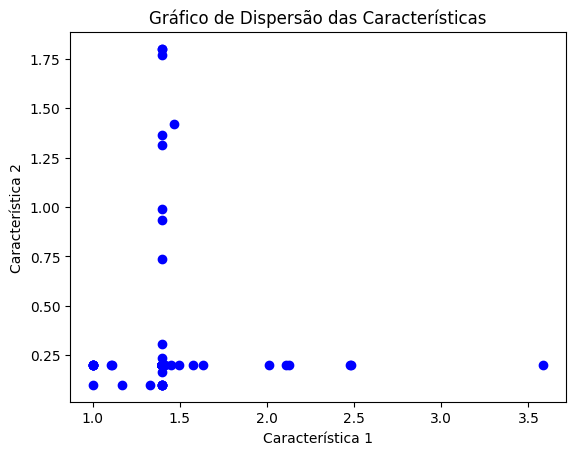

In [67]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[1], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

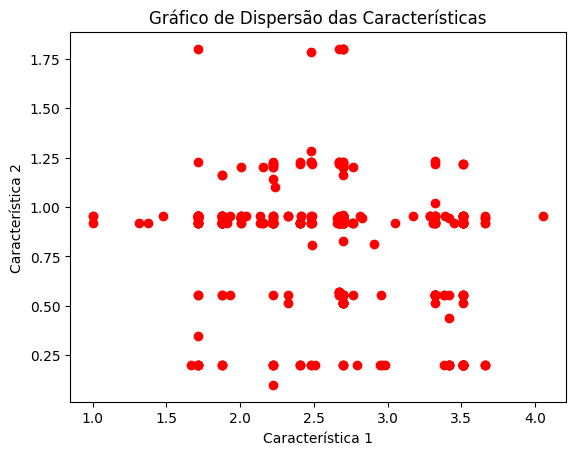

In [68]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[1], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [69]:
print(xi)

[1.4, 0.2]


In [70]:
XSSO=SSO.iloc[:,[0,1]].values
XSDO=SDO.iloc[:,[0,1]].values
#print(XSSO)
#print(XSDO)

In [71]:
XTOTAL = np.vstack((XSSO, XSDO))
#print(XTOTAL)

In [72]:
ytotal= bb.predict(XTOTAL)
ytotal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
ClassificadorDT.fit(XTOTAL, ytotal)

DecisionTreeClassifier(max_depth=15, random_state=42)

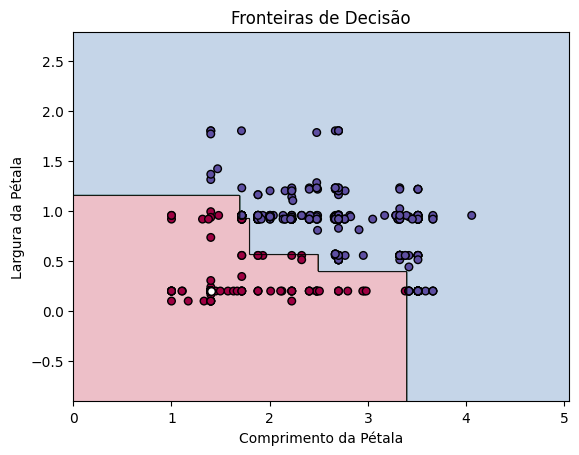

In [74]:
x_min, x_max = XTOTAL[:, 0].min() - 1, XTOTAL[:, 0].max() + 1
y_min, y_max = XTOTAL[:, 1].min() - 1, XTOTAL[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid') 
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

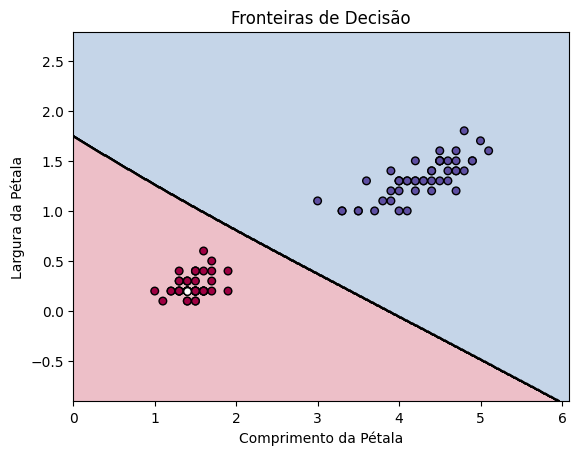

In [60]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

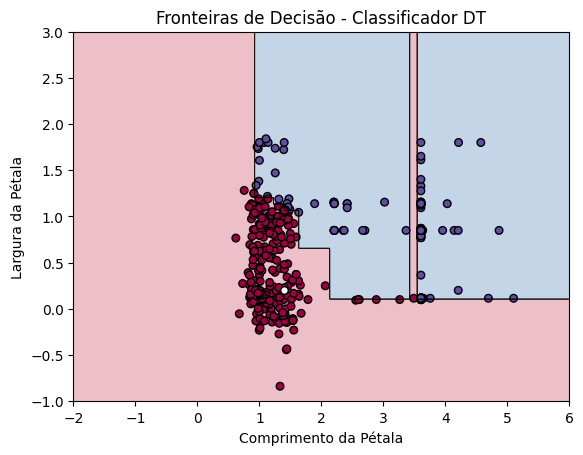

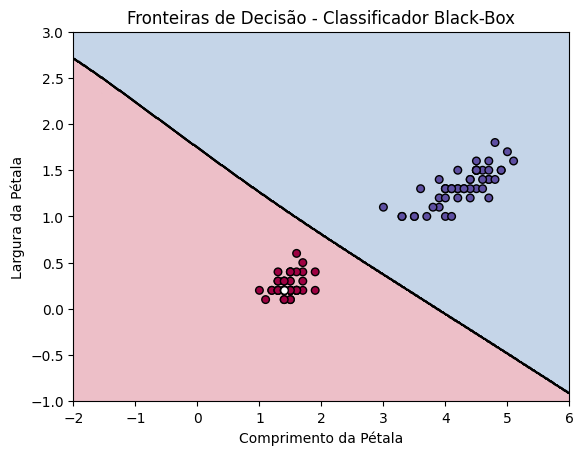

In [40]:
# Definir os limites manualmente
x_min = -2  # Substitua pelo limite desejado para o eixo X
x_max = 6   # Substitua pelo limite desejado para o eixo X
y_min = -1  # Substitua pelo limite desejado para o eixo Y
y_max = 3   # Substitua pelo limite desejado para o eixo Y

# Criar a grade de pontos com os valores fixos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Gráfico 1
Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid')
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador DT')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Gráfico 2
Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador Black-Box')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

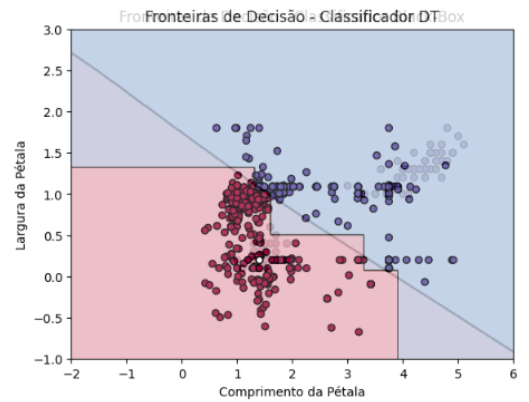

## Implementando a Árvore de Decisão

In [41]:
individuos_iniciais = df[['petal length (cm)', 'petal width (cm)']].values.tolist()
classes_iniciais = df['species'].tolist()
print(individuos_iniciais[idx]) 
print(classes_iniciais[idx])

[1.4, 0.2]
0


In [42]:
import numpy as np
xi = np.array(xi).reshape(1, -1)
print(xi)

[[1.4 0.2]]


In [43]:
Explicando=ClassificadorDT.predict(xi)
print(Explicando)

[0]


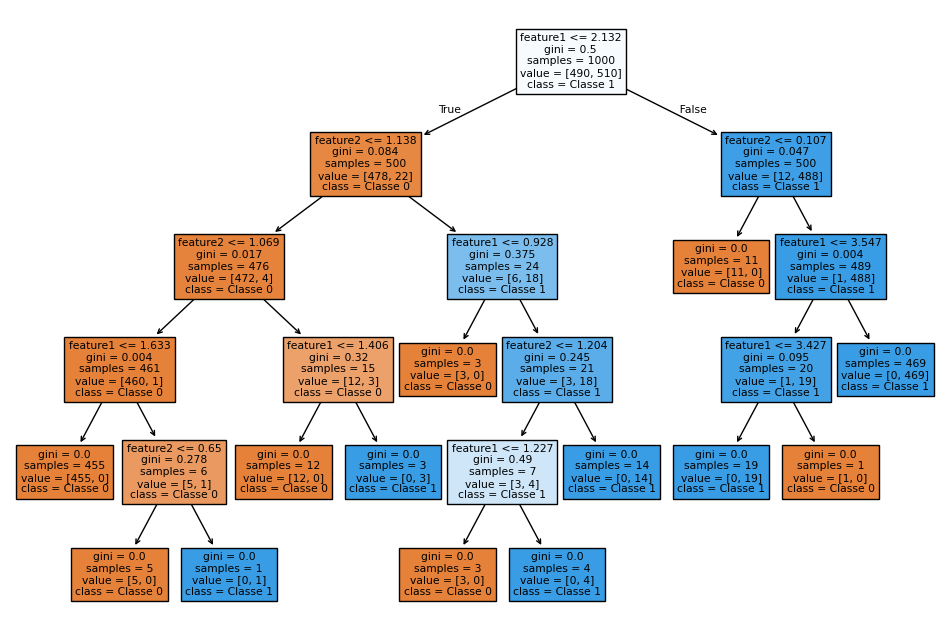

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(ClassificadorDT, filled=True, feature_names=["feature1", "feature2"], class_names=["Classe 0", "Classe 1"])
plt.show()

In [45]:
node_indicator = ClassificadorDT.decision_path(xi)
node_index = node_indicator.indices
print("Nós percorridos para essa amostra:", node_indicator)

thresholds = ClassificadorDT.tree_.threshold
features = ClassificadorDT.tree_.feature
children_left = ClassificadorDT.tree_.children_left
children_right = ClassificadorDT.tree_.children_right

for node in node_index:
    feature_index = features[node]  # índice da característica usada no nó
    threshold = thresholds[node]    # valor de corte
    value = xi[0][feature_index]    # Garantindo que 'value' seja um escalar

    # Verifica se o nó é uma folha
    if children_left[node] == -1 and children_right[node] == -1:
        print(f"A amostra {xi} chegou a uma folha no nó {node}.")

        print(f"A classe final da amostra {xi} é: {classes_iniciais[idx]}")  # Corrigido o acesso
    else:
        if value <= threshold:
            print(f"A amostra {xi} satisfaz a condição: {xi[0][feature_index]} <= {threshold} no nó {node}")
        else:
            print(f"A amostra {xi} NÃO satisfaz a condição: {xi[0][feature_index]} > {threshold} no nó {node}")

Nós percorridos para essa amostra: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 25)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
A amostra [[1.4 0.2]] satisfaz a condição: 1.4 <= 2.132146954536438 no nó 0
A amostra [[1.4 0.2]] satisfaz a condição: 0.2 <= 1.1379765272140503 no nó 1
A amostra [[1.4 0.2]] satisfaz a condição: 0.2 <= 1.0693011283874512 no nó 2
A amostra [[1.4 0.2]] satisfaz a condição: 1.4 <= 1.6327316761016846 no nó 3
A amostra [[1.4 0.2]] chegou a uma folha no nó 4.
A classe final da amostra [[1.4 0.2]] é: 0


In [46]:
#Decision_path retorna uma matriz esparsa, 
#Um objeto do tipo scipy.sparse.csr_matrix com forma (n_samples, n_nodes), onde:
#n_samples é o número de amostras em xi (conjunto de dados que queremos os caminhos percorridos, no nosso caso é apenas um indivíduo).
#n_nodes é o número total de nós na árvore.
#Se node_indicator[i, j] = 1, significa que a amostra i passou pelo nó j.

In [47]:
def get_decision_path(ClassificadorDT, xi, feature_names):
    """
    Retorna um dicionário com os nós percorridos e as decisões tomadas.
    """
    node_indicator = ClassificadorDT.decision_path(xi)
    leaf_id = ClassificadorDT.apply(xi)[0]  # Nó final

    feature = ClassificadorDT.tree_.feature
    threshold = ClassificadorDT.tree_.threshold

    decision_dict = {}
    for node_id in node_indicator.indices:
        if leaf_id == node_id:
            decision_dict[f"Nó {node_id}"] = "Folha"
        else:
            feature_index = feature[node_id]
            threshold_value = threshold[node_id]
            feature_name = feature_names[feature_index]
            sample_value = xi[0, feature_index]
            
            decision = f"{feature_name} <= {threshold_value}" if sample_value <= threshold_value else f"{feature_name} > {threshold_value}"
            decision_dict[f"Nó {node_id}"] = decision

    return decision_dict

feature_names_exp = df_binary.columns.tolist()
Explicação = get_decision_path(ClassificadorDT, xi, feature_names_exp)
print(Explicação)

{'Nó 0': 'petal length (cm) <= 2.132146954536438', 'Nó 1': 'petal width (cm) <= 1.1379765272140503', 'Nó 2': 'petal width (cm) <= 1.0693011283874512', 'Nó 3': 'petal length (cm) <= 1.6327316761016846', 'Nó 4': 'Folha'}


In [48]:
def print_decision_path(ClassificadorDT, xi, feature_names):
    node_indicator = ClassificadorDT.decision_path(xi)
    leaf_id = ClassificadorDT.apply(xi)[0]  # Obtém o nó folha
    feature = ClassificadorDT.tree_.feature
    threshold = ClassificadorDT.tree_.threshold

    print(f"Decisões tomadas para a amostra:\n")
    for node_id in node_indicator.indices:
        if node_id == leaf_id:
            print(f"Nó {node_id}: Folha atingida")
        else:
            feature_name = feature_names[feature[node_id]]
            threshold_value = threshold[node_id]
            sample_value = xi[0, feature[node_id]]
            
            if sample_value <= threshold_value:
                decision = f"{feature_name} <= {threshold_value}"
            else:
                decision = f"{feature_name} > {threshold_value}"

            print(f"Nó {node_id}: {decision}")

feature_names_exp = df_binary.columns.tolist()
print_decision_path(ClassificadorDT, xi, feature_names_exp)

Decisões tomadas para a amostra:

Nó 0: petal length (cm) <= 2.132146954536438
Nó 1: petal width (cm) <= 1.1379765272140503
Nó 2: petal width (cm) <= 1.0693011283874512
Nó 3: petal length (cm) <= 1.6327316761016846
Nó 4: Folha atingida
